In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotting_utils import binToDf
import seaborn as sns 
sns.set_theme(font_scale = 2)

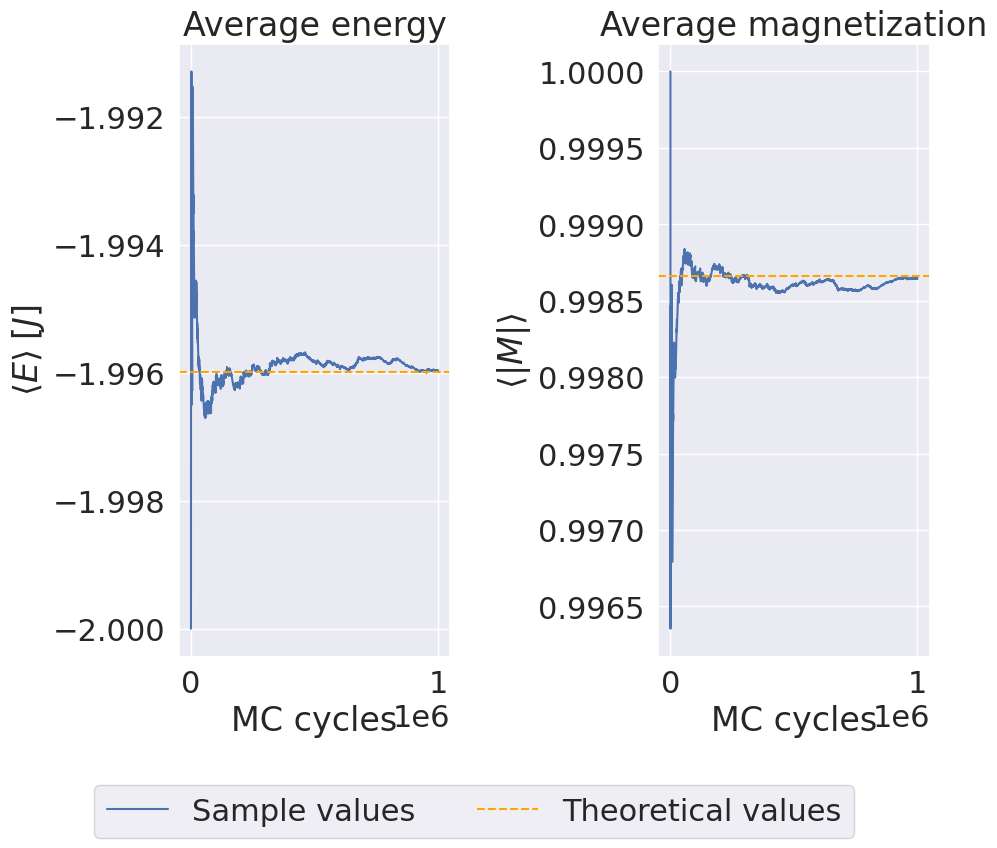

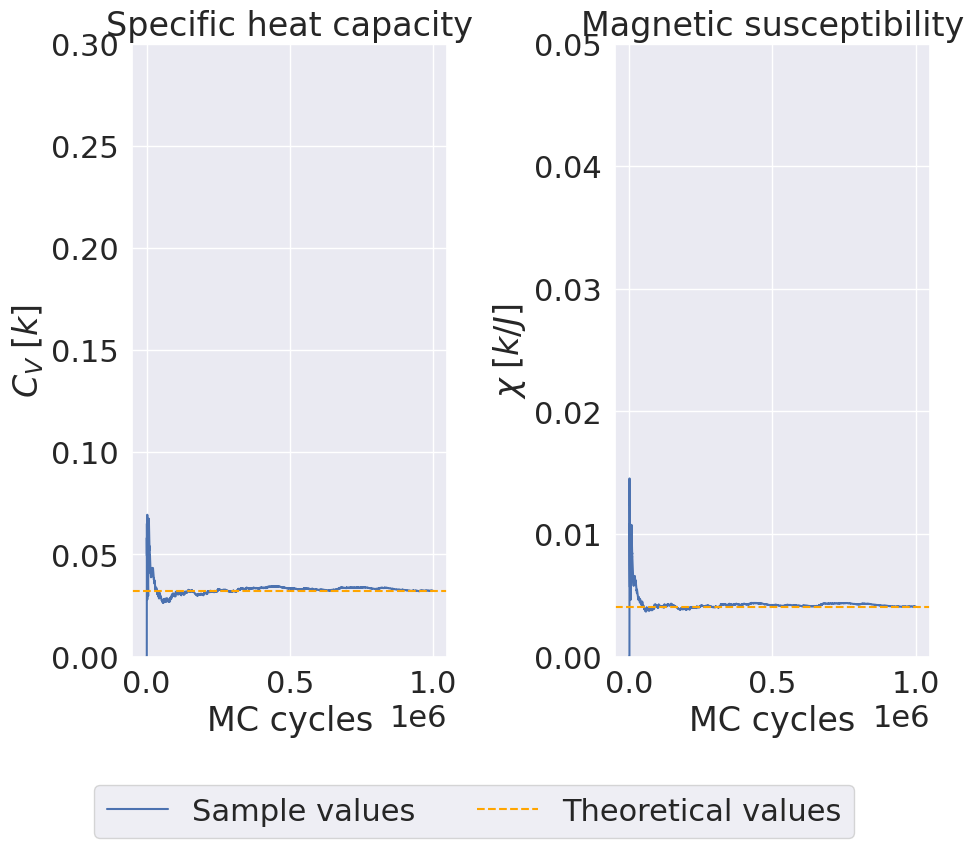

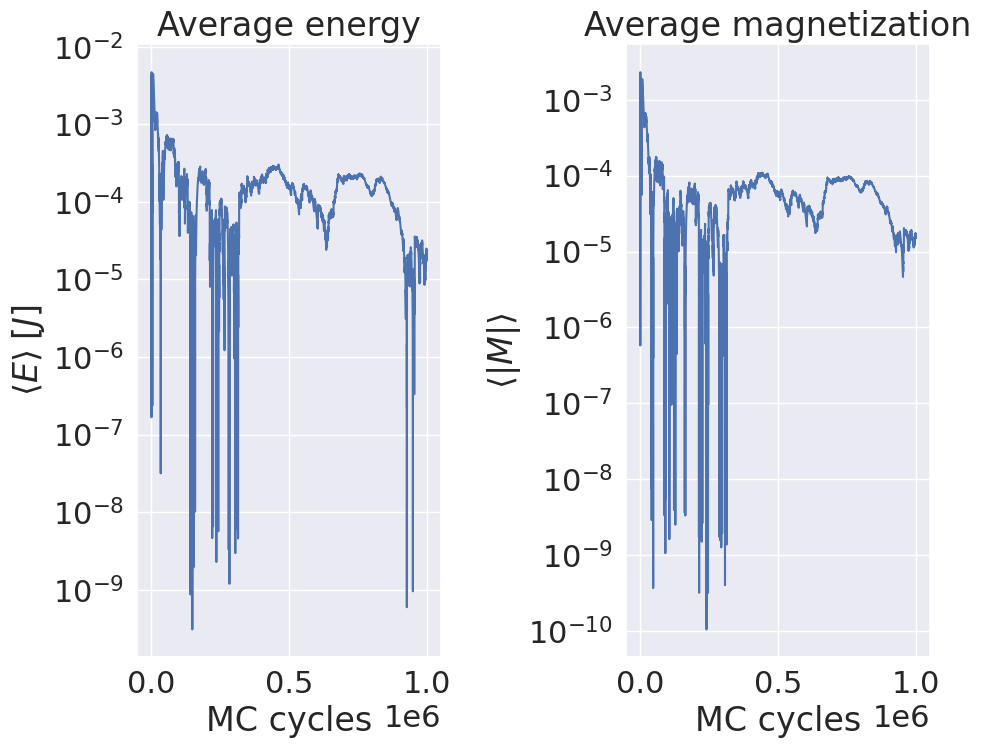

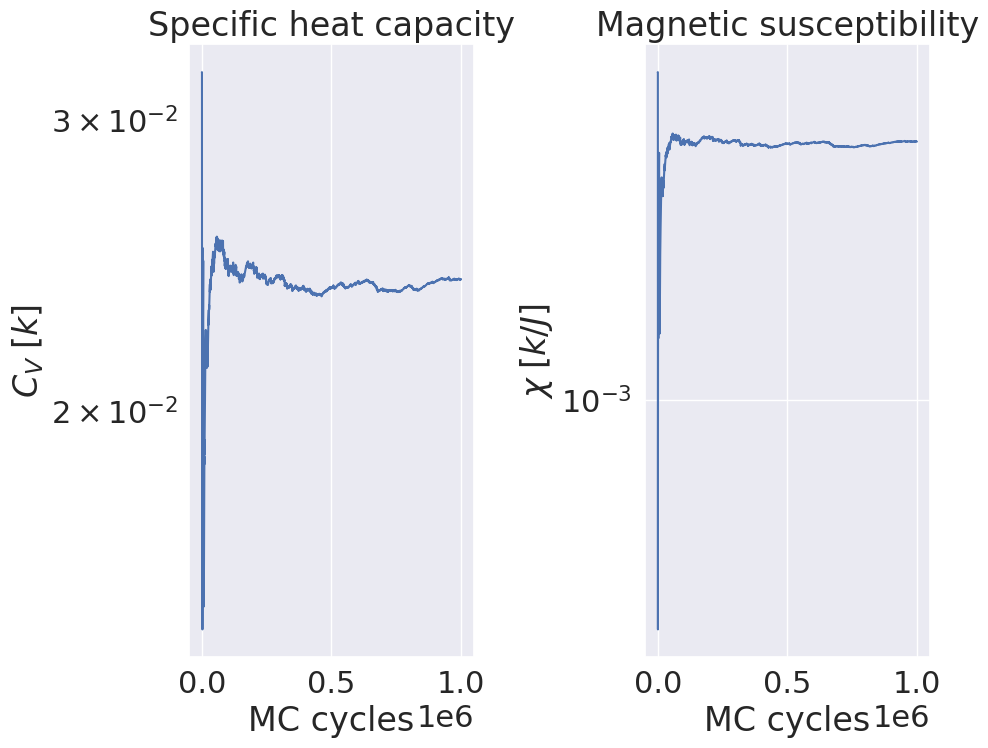

In [2]:
validation2x2 = binToDf('../output/validation2x2.bin')
T = np.mean(validation2x2.temperature)
L = validation2x2.gridsize[0]
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -8*np.sinh(8*beta)/Z
engMom2 = 32*np.cosh(8*beta)/Z
avgM = (4 + 2*np.exp(8*beta))/Z
mMom2 = (8 + 8*np.exp(8*beta))/Z
cV = 64/(T**2)*(1/Z*np.cosh(8*beta) - 4/Z**2*np.sinh(8*beta)**2)
chi = 8*beta*((1 + np.exp(8*beta))/Z - 2*(2 + np.exp(8*beta))**2/Z**2 )


cycles = np.arange(0, len(validation2x2))
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.energy1mom/(L**2), label = 'Sample values')
axs[0].axhline(avgEng, linestyle = '--', label = 'Theoretical values', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].plot(cycles, validation2x2.magnetization1mom/(L**2))
axs[1].axhline(avgM, linestyle = '--', color = 'orange')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.heatCapacity)
axs[0].axhline(cV, linestyle = '--', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_ylim([0, 0.3])
axs[0].set_title('Specific heat capacity')

axs[1].plot(cycles, validation2x2.susceptibility, label = 'Sample values')
axs[1].axhline(chi, linestyle = '--', color = 'orange', label = 'Theoretical values')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')
axs[1].set_ylim([0, 0.05])
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.energy1mom/(L**2) - avgEng))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].semilogy(cycles, abs(validation2x2.magnetization1mom/(L**2) - avgM))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')

axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.heatCapacity/(L**2) - cV))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_title('Specific heat capacity')

axs[1].semilogy(cycles, abs(validation2x2.susceptibility/(L**2) - chi))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')

axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

